In [1]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from datetime import datetime
#check multicollinearity of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
df_flights = pd.read_csv("data/T_ONTIME_REPORTING.csv")

In [5]:
df_flights2 = df_flights.copy(deep=True)

In [6]:
df_flights.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FL_DATE,611132,30,6/21/24 0:00,21235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,611132.0,NaN,NaN,NaN,19947.986186,371.470598,19393.0,19790.0,19930.0,20363.0,20452.0
OP_CARRIER_FL_NUM,611132.0,NaN,NaN,NaN,2531.827586,1650.672836,1.0,1165.0,2275.0,3794.0,8819.0
ORIGIN_AIRPORT_ID,611132.0,NaN,NaN,NaN,12635.064299,1534.864432,10135.0,11292.0,12889.0,14027.0,16869.0
ORIGIN_AIRPORT_SEQ_ID,611132.0,NaN,NaN,NaN,1263510.396099,153486.279623,1013506.0,1129202.0,1288904.0,1402702.0,1686902.0
ORIGIN_CITY_MARKET_ID,611132.0,NaN,NaN,NaN,31727.186294,1328.902452,30070.0,30615.0,31453.0,32467.0,35991.0
ORIGIN,611132,340,ATL,29361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEST_AIRPORT_ID,611132.0,NaN,NaN,NaN,12635.101899,1534.857077,10135.0,11292.0,12889.0,14027.0,16869.0
DEST_AIRPORT_SEQ_ID,611132.0,NaN,NaN,NaN,1263514.156156,153485.544155,1013506.0,1129202.0,1288904.0,1402702.0,1686902.0
DEST_CITY_MARKET_ID,611132.0,NaN,NaN,NaN,31727.248387,1328.926359,30070.0,30615.0,31453.0,32467.0,35991.0


In [7]:
df_flights.dtypes

FL_DATE                   object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
TAXI_OUT                 float64
WHEELS_OFF               float64
WHEELS_ON                float64
TAXI_IN                  float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY                float64
ARR_DELAY_NEW            float64
CANCELLED                  int64
CANCELLATION_CODE         object
DIVERTED                   int64
CRS_ELAPSED_TIME           int64
ACTUAL_ELAPSED_TIME      float64
AIR_TIME                 float64
CARRIER_DELAY            float64
WEATHER_DE

In [8]:
#drop column i dont need for lin reg
df_flights = df_flights.drop(columns=['OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID'])

In [9]:
df_flights = df_flights.drop(columns=['WHEELS_OFF','WHEELS_ON'])

In [10]:
df_flights = df_flights.drop(columns=['DIVERTED'])

In [11]:
df_flights = df_flights.drop(columns=['CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME'])

In [12]:
#drop rows where there is not a dept time or arr time
df_flights['CRS_DEP_TIME'].dropna(inplace=True)
df_flights['CRS_ARR_TIME'].dropna(inplace=True)
df_flights['CANCELLED'].dropna(inplace=True)

In [13]:
df_flights = df_flights.drop(columns=['CANCELLED','CANCELLATION_CODE'])

In [14]:
df_flights = df_flights.drop(columns=['FIRST_DEP_TIME','TOTAL_ADD_GTIME'])

In [15]:
df_flights = df_flights.drop(columns=['DEP_TIME','DEP_DELAY','TAXI_IN','TAXI_OUT','ARR_TIME','ARR_DELAY'])

In [16]:
df_flights = df_flights.drop(columns=['ARR_DELAY_NEW'])

In [17]:

df_flights['CARRIER_DELAY'].fillna(0, inplace=True)
df_flights['WEATHER_DELAY'].fillna(0, inplace=True)
df_flights['NAS_DELAY'].fillna(0, inplace=True)
df_flights['SECURITY_DELAY'].fillna(0, inplace=True)
df_flights['LATE_AIRCRAFT_DELAY'].fillna(0, inplace=True)
df_flights['DEP_DELAY_NEW'].fillna(0, inplace=True)


/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/726729122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flights['CARRIER_DELAY'].fillna(0, inplace=True)
/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/726729122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [18]:
#put into time format
df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].astype(str).apply(lambda x: x.zfill(4))

df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].astype(str).apply(lambda x: x.zfill(4))


In [19]:
def add_colon (string):
  return string [:-2] + ":" + string[-2:]

In [20]:
df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].apply(add_colon)

In [21]:
df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].apply(add_colon)

In [22]:
df_flights.dtypes

FL_DATE                   object
OP_CARRIER_AIRLINE_ID      int64
ORIGIN                    object
DEST                      object
CRS_DEP_TIME              object
DEP_DELAY_NEW            float64
CRS_ARR_TIME              object
CARRIER_DELAY            float64
WEATHER_DELAY            float64
NAS_DELAY                float64
SECURITY_DELAY           float64
LATE_AIRCRAFT_DELAY      float64
dtype: object

In [23]:
df_flights.head(7)

,FL_DATE,OP_CARRIER_AIRLINE_ID,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,6/1/24 0:00,19393,DAL,HOU,18:00,47.0,19:10,15.0,0.0,0.0,0.0,18.0
1,6/1/24 0:00,19393,HOU,CRP,20:00,12.0,21:05,0.0,0.0,0.0,0.0,0.0
2,6/1/24 0:00,19393,HOU,DAL,08:50,2.0,10:05,0.0,0.0,0.0,0.0,0.0
3,6/1/24 0:00,19393,MCO,IND,14:10,0.0,16:35,0.0,0.0,0.0,0.0,0.0
4,6/1/24 0:00,19393,MCO,BWI,09:40,0.0,12:00,0.0,0.0,0.0,0.0,0.0
5,6/1/24 0:00,19393,MCO,BWI,13:05,18.0,15:15,0.0,0.0,0.0,0.0,0.0
6,6/1/24 0:00,19393,MCO,BWI,15:55,0.0,18:15,0.0,0.0,0.0,0.0,0.0


In [24]:
df_flights['FL_DATE'] = pd.to_datetime(df_flights['FL_DATE'])
df_flights['day_of_week'] = df_flights['FL_DATE'].dt.day_name()

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/1908295118.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_flights['FL_DATE'] = pd.to_datetime(df_flights['FL_DATE'])


In [25]:
#remove date col
df_flights.drop(columns=['FL_DATE'], inplace = True)

In [26]:
df_flights['CRS_DEP_TIME_HR'] = df_flights['CRS_DEP_TIME'].str.slice(0, 2)
df_flights['CRS_ARR_TIME_HR'] = df_flights['CRS_ARR_TIME'].str.slice(0, 2)

In [27]:
df_flights['TOTAL_DELAY'] = df_flights['DEP_DELAY_NEW'] + df_flights['CARRIER_DELAY'] + df_flights['NAS_DELAY'] + df_flights['WEATHER_DELAY'] + df_flights['SECURITY_DELAY'] + df_flights['LATE_AIRCRAFT_DELAY']

In [28]:
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19790, 'Delta Airline')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19805, 'American Airline')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20304, 'SkyWest Airline')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20436, 'Frontier Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20397, 'PSA Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20416, 'Spirit Air')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20409, 'JetBlue Airways')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19393, 'SouthWest Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19930, 'Alaska Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20452, 'Republic Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20363, 'Endeavor Air')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19690, 'Hawaiian Airlines')

In [29]:
df_flights['CARRIER_DELAY_BI'] = df_flights['CARRIER_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['WEATHER_DELAY_BI'] = df_flights['WEATHER_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['NAS_DELAY_BI'] = df_flights['NAS_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['SECURITY_DELAY_BI'] = df_flights['SECURITY_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['LATE_AIRCRAFT_DELAY_BI'] = df_flights['LATE_AIRCRAFT_DELAY'].apply(lambda x: 0 if x == 0 else 1)

In [30]:
df_flights2.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME
0,6/1/24 0:00,19393,1,11259,1125904,30194,DAL,12191,1219103,31453,HOU,1800,1847.0,47.0,47.0,9.0,1856.0,1936.0,7.0,1910,1943.0,33.0,33.0,0,NaN,0,70,56.0,40.0,15.0,0.0,0.0,0.0,18.0,NaN,NaN
1,6/1/24 0:00,19393,1,12191,1219103,31453,HOU,11140,1114008,31140,CRP,2000,2012.0,12.0,12.0,10.0,2022.0,2057.0,4.0,2105,2101.0,-4.0,0.0,0,NaN,0,65,49.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/1/24 0:00,19393,10,12191,1219103,31453,HOU,11259,1125904,30194,DAL,850,852.0,2.0,2.0,8.0,900.0,943.0,3.0,1005,946.0,-19.0,0.0,0,NaN,0,75,54.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/1/24 0:00,19393,1001,13204,1320402,31454,MCO,12339,1233904,32337,IND,1410,1409.0,-1.0,0.0,14.0,1423.0,1612.0,8.0,1635,1620.0,-15.0,0.0,0,NaN,0,145,131.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/1/24 0:00,19393,1002,13204,1320402,31454,MCO,10821,1082106,30852,BWI,940,939.0,-1.0,0.0,18.0,957.0,1138.0,5.0,1200,1143.0,-17.0,0.0,0,NaN,0,140,124.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_flights2['TOTAL_DELAY'] = df_flights2['DEP_DELAY_NEW'] + df_flights2['CARRIER_DELAY'] + df_flights2['NAS_DELAY'] + df_flights2['WEATHER_DELAY'] + df_flights2['SECURITY_DELAY'] + df_flights2['LATE_AIRCRAFT_DELAY']

In [32]:
delays_ts = pd.Series(df_flights2.TOTAL_DELAY.values,
index=df_flights2.FL_DATE,
name='delay minutes')

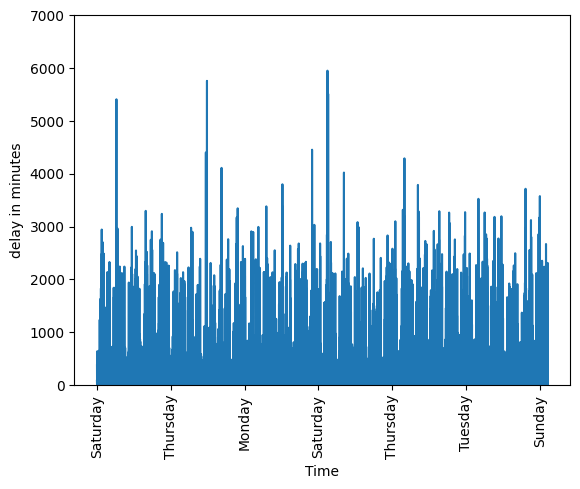

In [33]:
delays_graph = pd.Series(df_flights.TOTAL_DELAY.values,
index=df_flights.day_of_week,
name='delay minutes')

delay_days_plot = delays_graph.plot()
delay_days_plot.set_xlabel('Time')
delay_days_plot.set_ylabel('delay in minutes')
delay_days_plot.set_ylim(0,7000)
delay_days_plot.tick_params(axis='x', labelrotation=90)
plt.show()

avg_delay_x = df_flights['day_of_week']
avg_delay_y = df_flights['TOTAL_DELAY'].mean()

plt.bar(avg_delay_x, avg_delay_y, width = 0.4)
plt.xlabel('Time')
plt.ylabel('avg delay in minutes')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [34]:
dummy_data_origin = pd.get_dummies(df_flights[['ORIGIN']],drop_first=True)
dummy_data_origin.replace({False:0, True:1},inplace = True)

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/1714083376.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_origin.replace({False:0, True:1},inplace = True)


In [35]:
dummy_data_dest = pd.get_dummies(df_flights[['DEST']],drop_first=True)
dummy_data_dest.replace({False:0, True:1}, inplace = True)

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/48953536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_dest.replace({False:0, True:1}, inplace = True)


In [36]:
dummy_data_airline = pd.get_dummies(df_flights[['OP_CARRIER_AIRLINE_ID']],drop_first=True)
dummy_data_airline.replace({False:0, True:1}, inplace = True)

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/284321198.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_airline.replace({False:0, True:1}, inplace = True)


In [37]:
dummy_data_day = pd.get_dummies(df_flights[['day_of_week']],drop_first=True)
dummy_data_day.replace({False:0, True:1}, inplace = True)

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/1648444017.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_day.replace({False:0, True:1}, inplace = True)


In [38]:
dummy_data_dephr= pd.get_dummies(df_flights[['CRS_DEP_TIME_HR']],drop_first=True)
dummy_data_dephr.replace({False:0, True:1}, inplace = True)

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/2227274183.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_dephr.replace({False:0, True:1}, inplace = True)


In [39]:
dummy_data_arrhr= pd.get_dummies(df_flights[['CRS_ARR_TIME_HR']],drop_first=True)
dummy_data_arrhr.replace({False:0, True:1}, inplace = True)

/var/folders/jq/51d8jm5x4v5crly84p0n52qr0000gn/T/ipykernel_51431/2124008887.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_arrhr.replace({False:0, True:1}, inplace = True)


In [42]:
#cols joining from main set
num_name = ['CARRIER_DELAY_BI','WEATHER_DELAY_BI','NAS_DELAY_BI','SECURITY_DELAY_BI','LATE_AIRCRAFT_DELAY_BI']


In [43]:
#joing dummy sets with og set = model_data

df_origin_og = pd.concat([df_flights[num_name], dummy_data_origin],axis=1)
df_origin_og.describe(include='all')

,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,ORIGIN_ATL,...,ORIGIN_SWF,ORIGIN_SWO,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TOL,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TTN,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TWF,ORIGIN_TXK,ORIGIN_TYR,ORIGIN_TYS,ORIGIN_USA,ORIGIN_VCT,ORIGIN_VLD,ORIGIN_VPS,ORIGIN_WRG,ORIGIN_WYS,ORIGIN_XNA,ORIGIN_XWA,ORIGIN_YAK,ORIGIN_YUM
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,0.048044,...,0.000057,0.000098,0.001973,0.000866,0.000043,0.010222,0.000304,0.000219,0.002543,0.002230,0.000835,0.000098,0.000098,0.000147,0.002400,0.00010,0.000083,0.000098,0.001867,0.000098,0.000101,0.001914,0.000278,0.000098,0.000193
std,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,0.213859,...,0.007568,0.009908,0.044379,0.029408,0.006522,0.100586,0.017443,0.014806,0.050362,0.047173,0.028876,0.009908,0.009908,0.012135,0.048936,0.00999,0.009135,0.009908,0.043169,0.009908,0.010072,0.043713,0.016676,0.009908,0.013894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000

In [44]:
#joing dummy sets with og set = model_data

df_withdest = pd.concat([df_origin_og, dummy_data_dest],axis=1)
df_withdest.describe(include='all')

,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,ORIGIN_ATL,...,DEST_SWF,DEST_SWO,DEST_SYR,DEST_TLH,DEST_TOL,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TWF,DEST_TXK,DEST_TYR,DEST_TYS,DEST_USA,DEST_VCT,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,0.048044,...,0.000057,0.000098,0.001975,0.000866,0.000043,0.010215,0.000306,0.000219,0.002541,0.002227,0.000838,0.000098,0.000098,0.000147,0.002400,0.00010,0.000083,0.000098,0.001867,0.000098,0.000101,0.001919,0.000278,0.000098,0.000193
std,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,0.213859,...,0.007568,0.009908,0.044397,0.029408,0.006522,0.100554,0.017490,0.014806,0.050346,0.047139,0.028932,0.009908,0.009908,0.012135,0.048936,0.00999,0.009135,0.009908,0.043169,0.009908,0.010072,0.043769,0.016676,0.009908,0.013894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0000

In [45]:
df_withairline = pd.concat([df_withdest, dummy_data_airline],axis=1)
df_withairline.describe(include='all')

,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,ORIGIN_ATL,...,DEST_TYS,DEST_USA,DEST_VCT,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM,OP_CARRIER_AIRLINE_ID_20368,OP_CARRIER_AIRLINE_ID_20398,OP_CARRIER_AIRLINE_ID_Alaska Airlines,OP_CARRIER_AIRLINE_ID_American Airline,OP_CARRIER_AIRLINE_ID_Delta Airline,OP_CARRIER_AIRLINE_ID_Endeavor Air,OP_CARRIER_AIRLINE_ID_Frontier Airlines,OP_CARRIER_AIRLINE_ID_Hawaiian Airlines,OP_CARRIER_AIRLINE_ID_JetBlue Airways,OP_CARRIER_AIRLINE_ID_PSA Airlines,OP_CARRIER_AIRLINE_ID_Republic Airlines,OP_CARRIER_AIRLINE_ID_SkyWest Airline,OP_CARRIER_AIRLINE_ID_SouthWest Airlines,OP_CARRIER_AIRLINE_ID_Spirit Air
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000
mean,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,0.048044,...,0.002400,0.00010,0.000083,0.000098,0.001867,0.000098,0.000101,0.001919,0.000278,0.000098,0.000193,0.020010,0.041089,0.036270,0.140037,0.145738,0.027313,0.030511,0.010795,0.032567,0.030314,0.040096,0.101211,0.202603,0.03835
std,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,0.213859,...,0.048936,0.00999,0.009135,0.009908,0.043169,0.009908,0.010072,0.043769,0.016676,0.009908,0.013894,0.140036,0.198497,0.186962,0.347026,0.352843,0.162995,0.171988,0.103335,0.177502,0.171451,0.196185,0.301608,0.401939,0.19204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [46]:
df_withday = pd.concat([df_withairline, dummy_data_day],axis=1)
df_withday.describe(include='all')

,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,ORIGIN_ATL,...,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM,OP_CARRIER_AIRLINE_ID_20368,OP_CARRIER_AIRLINE_ID_20398,OP_CARRIER_AIRLINE_ID_Alaska Airlines,OP_CARRIER_AIRLINE_ID_American Airline,OP_CARRIER_AIRLINE_ID_Delta Airline,OP_CARRIER_AIRLINE_ID_Endeavor Air,OP_CARRIER_AIRLINE_ID_Frontier Airlines,OP_CARRIER_AIRLINE_ID_Hawaiian Airlines,OP_CARRIER_AIRLINE_ID_JetBlue Airways,OP_CARRIER_AIRLINE_ID_PSA Airlines,OP_CARRIER_AIRLINE_ID_Republic Airlines,OP_CARRIER_AIRLINE_ID_SkyWest Airline,OP_CARRIER_AIRLINE_ID_SouthWest Airlines,OP_CARRIER_AIRLINE_ID_Spirit Air,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,0.048044,...,0.000101,0.001919,0.000278,0.000098,0.000193,0.020010,0.041089,0.036270,0.140037,0.145738,0.027313,0.030511,0.010795,0.032567,0.030314,0.040096,0.101211,0.202603,0.03835,0.138096,0.153368,0.169363,0.138335,0.130065,0.131919
std,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,0.213859,...,0.010072,0.043769,0.016676,0.009908,0.013894,0.140036,0.198497,0.186962,0.347026,0.352843,0.162995,0.171988,0.103335,0.177502,0.171451,0.196185,0.301608,0.401939,0.19204,0.345001,0.360342,0.375072,0.345252,0.336375,0.338403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0

In [47]:
df_withdephr = pd.concat([df_withday, dummy_data_dephr],axis=1)
df_withdephr.describe(include='all')

: 

In [ ]:
df_linmodel = pd.concat([df_withdephr, dummy_data_arrhr],axis=1)

In [ ]:
df_linmodel.head(20)

In [ ]:
# #took too long to run
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_linmodel.columns
# vif_data["VIF"] = [vif(df_linmodel.values,i) for i in range(len(df_linmodel.columns))]
# print(vif_data)

In [ ]:
y = df_flights['TOTAL_DELAY']
y.describe()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_linmodel, y ,test_size=0.3,random_state=0)

In [ ]:
model = LinearRegression().fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_val)
print(predictions)

In [ ]:
print('Score (Training):  {:.3f}'.format(model.score(x_train, y_train)))
print('Score (Test):      {:.3f}'.format(model.score(x_val, y_val)))

In [ ]:
print("Coefficients: \n", model.coef_)

lincoeffs = pd.DataFrame(model.coef_, x_train.columns, columns=['Coefficients'])
lincoeffs.head()

In [ ]:
x_train_sm = sm.add_constant(x_train)
# Fit the model with statsmodels
est = sm.OLS(y_train, x_train_sm)
est2 = est.fit()
print(est2.summary())

In [ ]:
# df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].replace('24:00', '23:59')
# df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].replace('24:00', '23:59')

In [ ]:
# df_flights['CRS_DEP_TIME'] = pd.to_datetime(df_flights['CRS_DEP_TIME'], format='%H:%M:%S')

In [ ]:
# df_flights['CRS_ARR_TIME'] = pd.to_datetime(df_flights['CRS_ARR_TIME'], format='%H:%M')

# df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].dt.time